In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv("/content/cosmetic_shop_dataset.csv")
df.head()

,ID,Age,Income,Gender,Marital_Status,Buys
0,1,21,High,Male,Single,No
1,2,27,High,Male,Married,No
2,3,35,High,Male,Single,Yes
3,4,32,Medium,Male,Single,Yes
4,5,30,Low,Female,Single,Yes


In [ ]:
df['Income'] = df['Income'].map({'High':3 ,'Medium':2 ,'Low':1 })
df['Gender'] = df['Gender'].map({'Male':1 ,'Female':2})
df['Marital_Status'] = df['Marital_Status'].map({'Single':1 ,'Married':2})
df['Buys'] = df['Buys'].map({'No':1 , 'Yes':2})

In [ ]:
df.head()
df.columns

Index(['ID', 'Age', 'Income', 'Gender', 'Marital_Status', 'Buys'], dtype='object')

In [ ]:
X = df.drop(['ID' , 'Buys'] , axis = 1)
y = df['Buys']
X.head()
y.head()

0    1
1    1
2    2
3    2
4    2
Name: Buys, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test , y_pred))
print("The accuracy score is : " , accuracy_score(y_test , y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

The accuracy score is :  1.0


<Axes: >

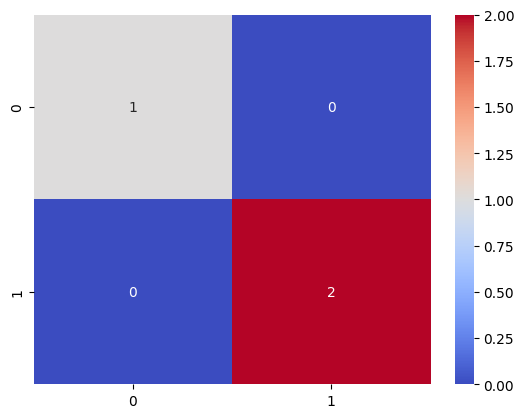

In [ ]:
matrix = confusion_matrix(y_test , y_pred)

sns.heatmap(matrix , annot = True , cmap= "coolwarm")

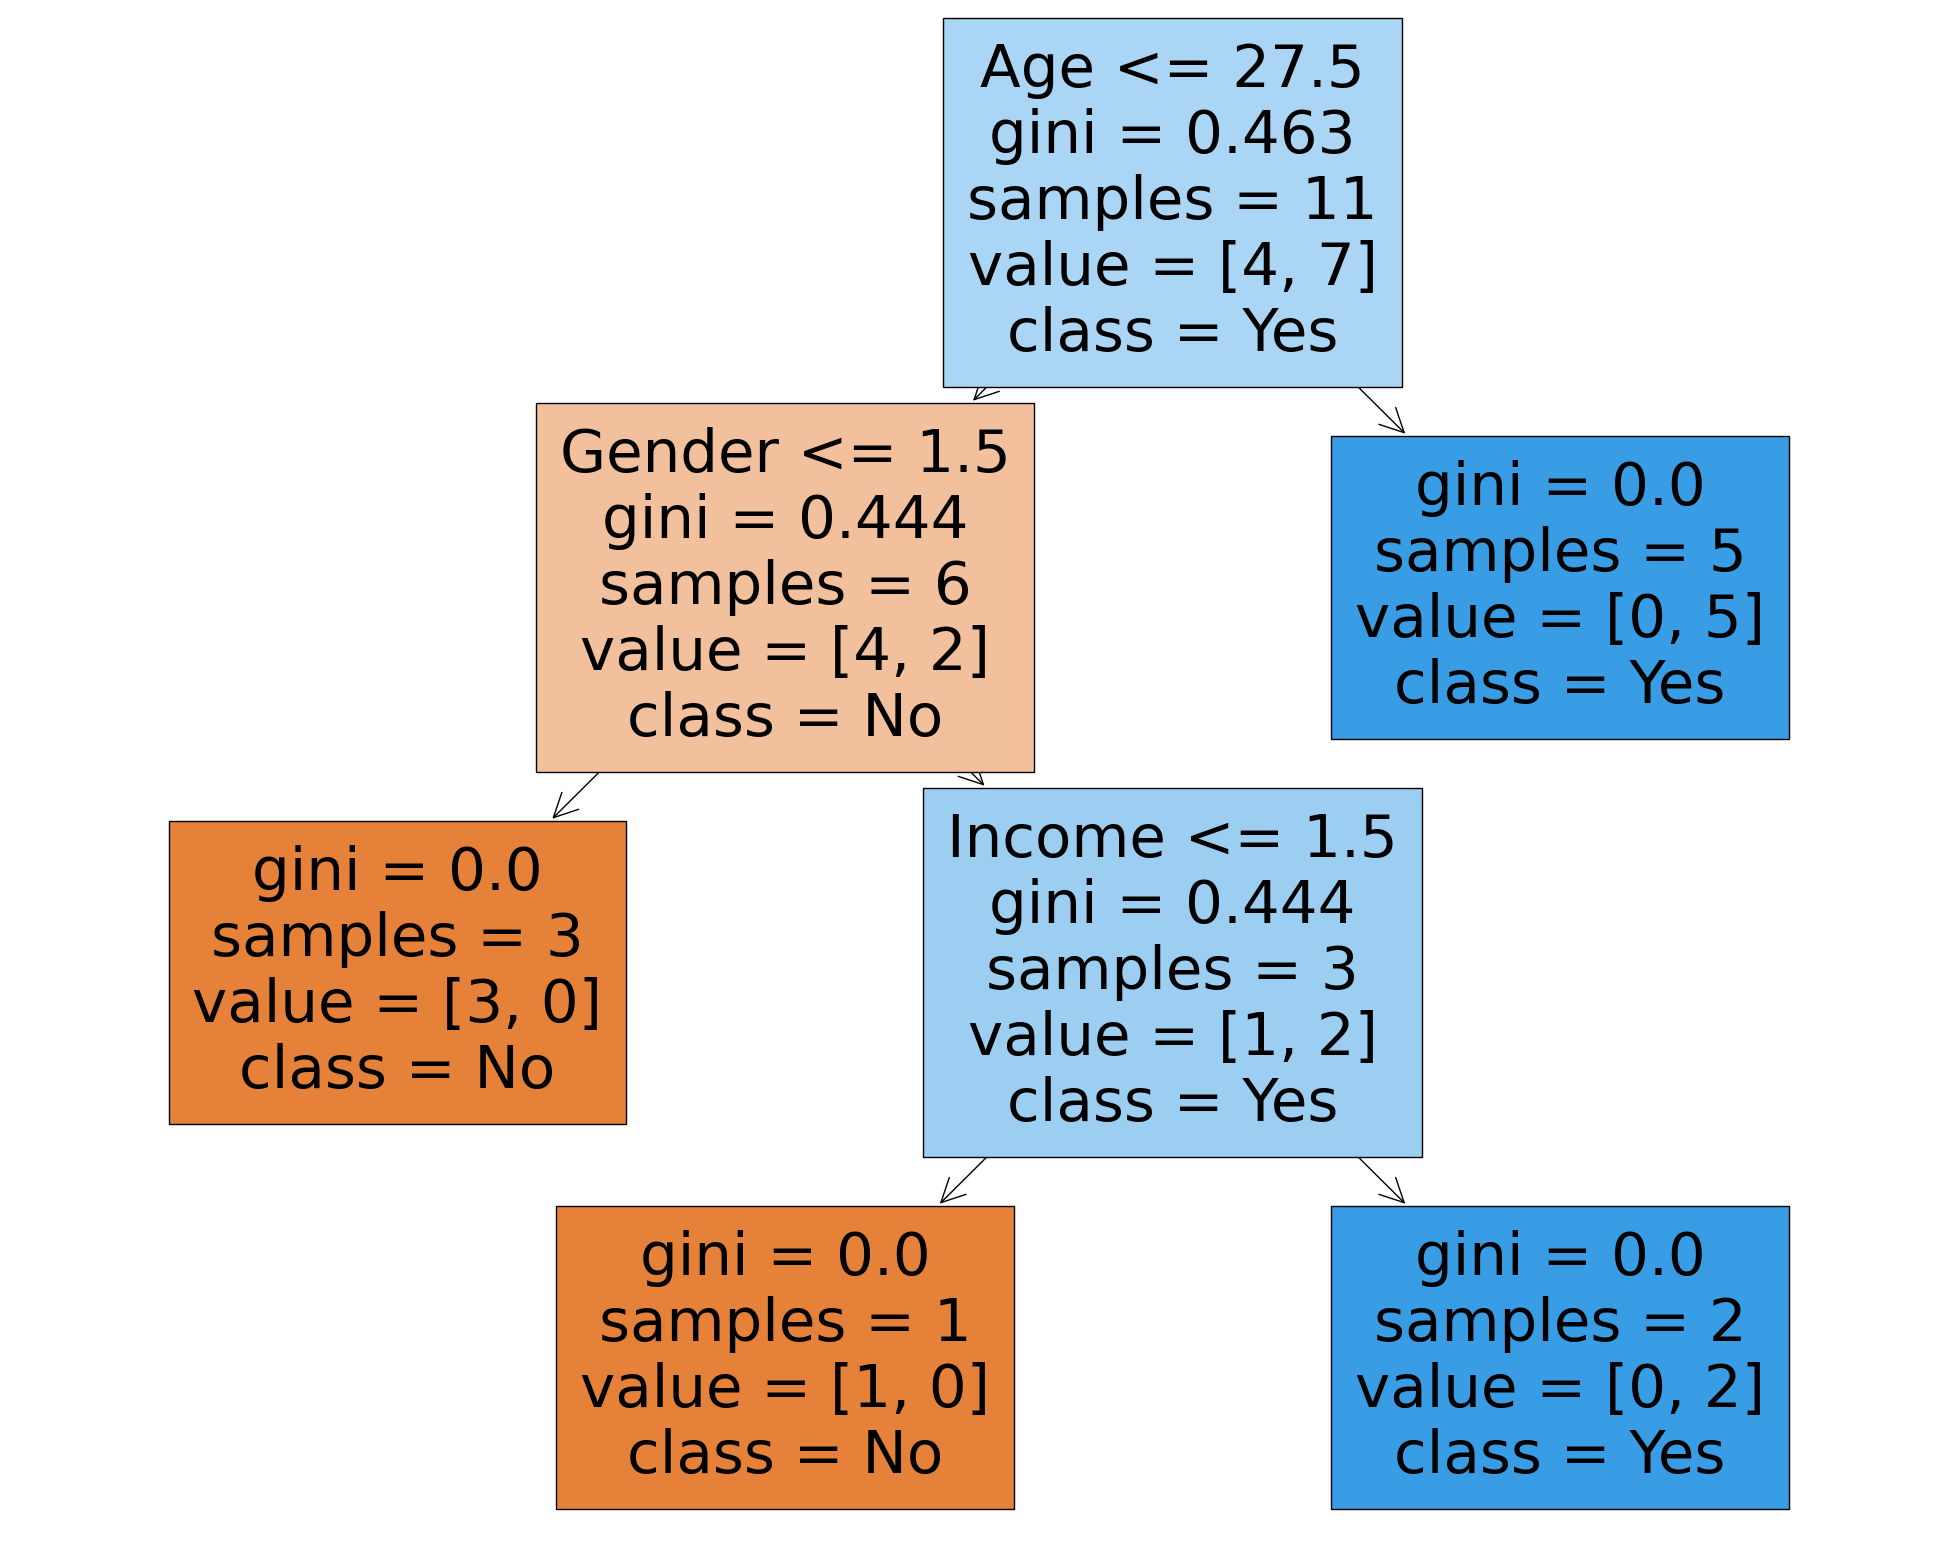

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=["No" , "Yes"],
                   filled=True)